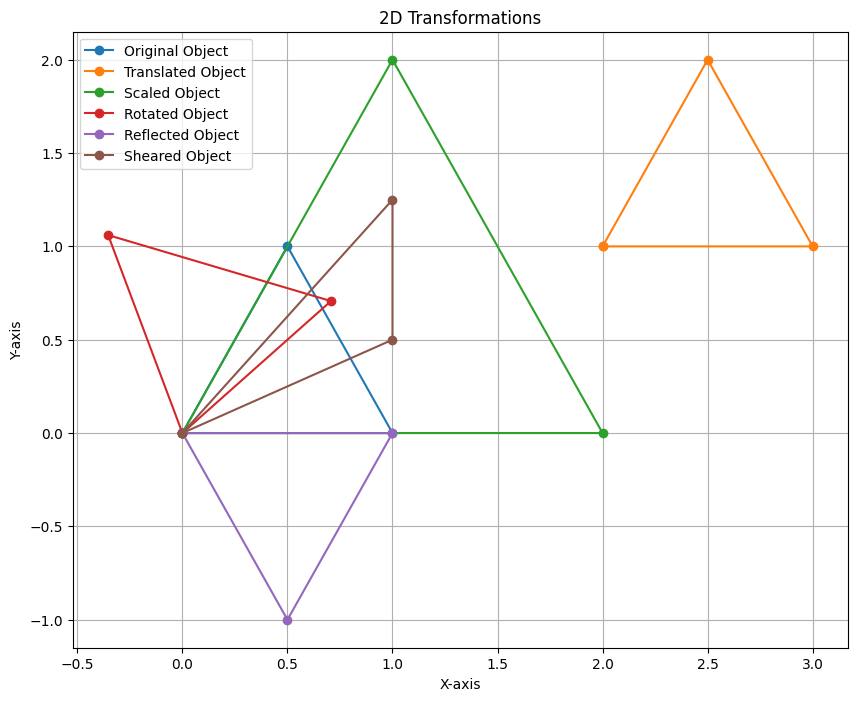

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D object (triangle as example)
object_points = np.array([
    [0, 0],  # Point A
    [1, 0],  # Point B
    [0.5, 1],  # Point C
    [0, 0]  # Closing the triangle
])

def apply_transformation(points, matrix):
    """Apply transformation matrix to a set of points."""
    # Add a column of 1s for homogeneous coordinates
    points_homogeneous = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = np.dot(points_homogeneous, matrix.T)
    return transformed_points[:, :2]

# Define transformation matrices
translation_matrix = np.array([[1, 0, 2], [0, 1, 1], [0, 0, 1]])  # Translate by (2, 1)
scaling_matrix = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])  # Scale by 2x
rotation_matrix = np.array([
    [np.cos(np.pi / 4), -np.sin(np.pi / 4), 0],
    [np.sin(np.pi / 4),  np.cos(np.pi / 4), 0],
    [0, 0, 1]
])  # Rotate by 45 degrees
reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])  # Reflect across x-axis
shearing_matrix = np.array([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]])  # Shear by 0.5 in x and y

# Apply transformations
translated_points = apply_transformation(object_points, translation_matrix)
scaled_points = apply_transformation(object_points, scaling_matrix)
rotated_points = apply_transformation(object_points, rotation_matrix)
reflected_points = apply_transformation(object_points, reflection_matrix)
sheared_points = apply_transformation(object_points, shearing_matrix)

# Plot original and transformed objects
plt.figure(figsize=(10, 8))
plt.plot(*object_points.T, label="Original Object", marker='o')
plt.plot(*translated_points.T, label="Translated Object", marker='o')
plt.plot(*scaled_points.T, label="Scaled Object", marker='o')
plt.plot(*rotated_points.T, label="Rotated Object", marker='o')
plt.plot(*reflected_points.T, label="Reflected Object", marker='o')
plt.plot(*sheared_points.T, label="Sheared Object", marker='o')

plt.legend()
plt.grid()
plt.title("2D Transformations")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


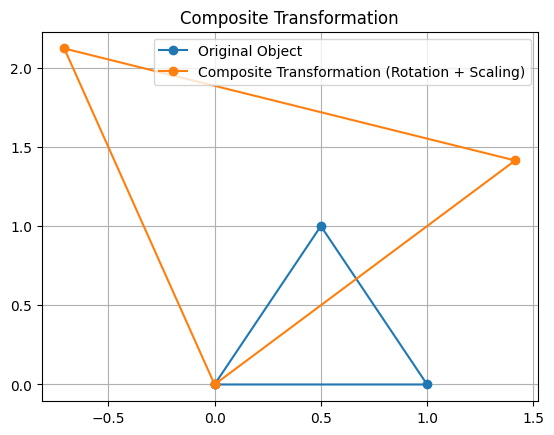

In [ ]:
composite_matrix = np.dot(rotation_matrix, scaling_matrix)
composite_points = apply_transformation(object_points, composite_matrix)

plt.plot(*object_points.T, label="Original Object", marker='o')
plt.plot(*composite_points.T, label="Composite Transformation (Rotation + Scaling)", marker='o')
plt.legend()
plt.grid()
plt.title("Composite Transformation")
plt.show()


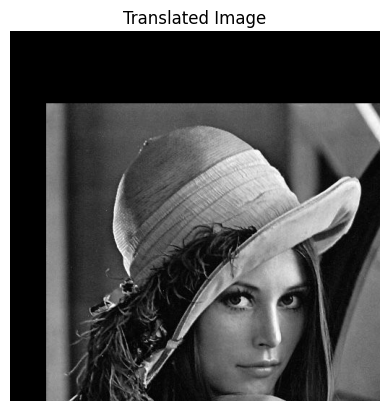

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/Picture1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

def show_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, translation_matrix, (cols, rows))

translated = translate_image(image, 50, 100)
show_image("Translated Image", translated)


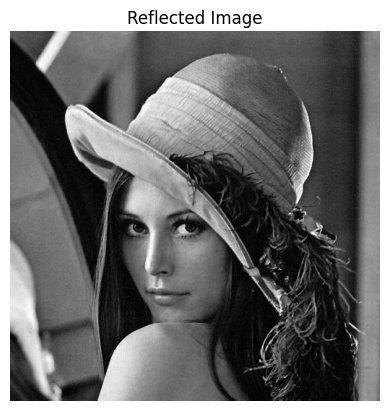

In [ ]:
# 2. Image Reflection
def reflect_image(img):
    return cv2.flip(img, 1)  # Horizontal flip

reflected = reflect_image(image)
show_image("Reflected Image", reflected)

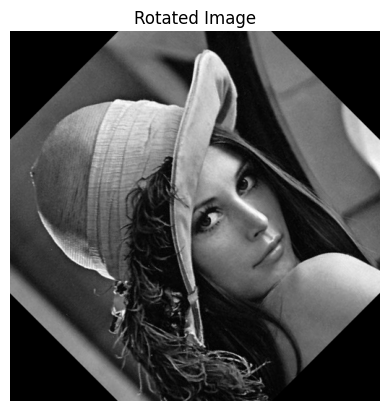

In [ ]:
# 3. Image Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))

rotated = rotate_image(image, 45)
show_image("Rotated Image", rotated)

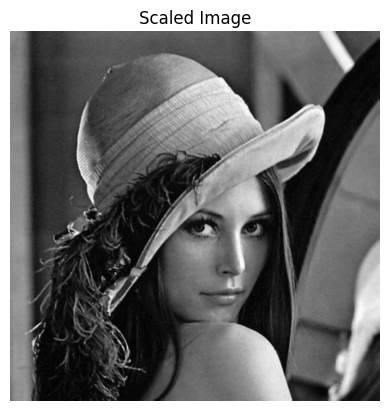

In [ ]:
# 4. Image Scaling
def scale_image(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled = scale_image(image, 1.5, 1.5)
show_image("Scaled Image", scaled)


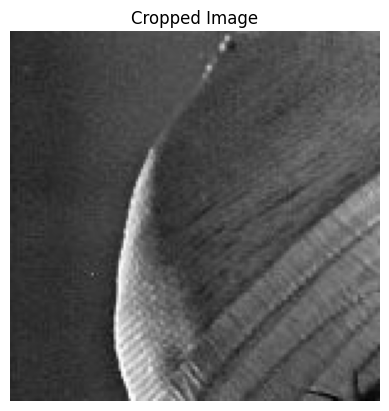

In [ ]:
# 5. Image Cropping
def crop_image(img, x_start, y_start, x_end, y_end):
    return img[y_start:y_end, x_start:x_end]

cropped = crop_image(image, 50, 50, 200, 200)
show_image("Cropped Image", cropped)

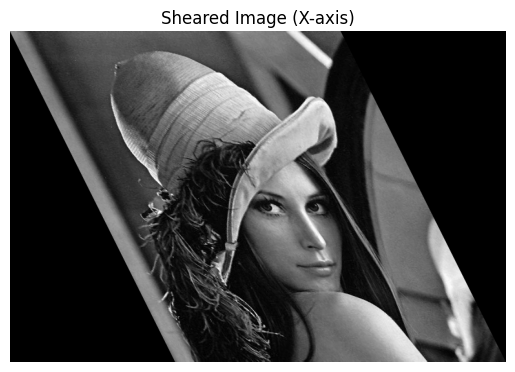

In [ ]:
# 6. Shearing (X-axis)
def shear_image_x(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols + int(shear_factor * rows), rows))

sheared_x = shear_image_x(image, 0.5)
show_image("Sheared Image (X-axis)", sheared_x)

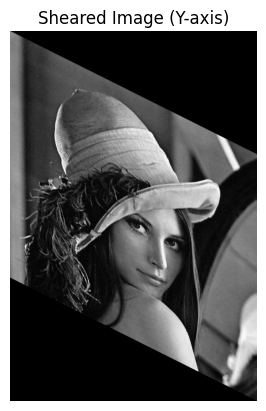

In [ ]:
# 7. Shearing (Y-axis)
def shear_image_y(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols, rows + int(shear_factor * cols)))

sheared_y = shear_image_y(image, 0.5)
show_image("Sheared Image (Y-axis)", sheared_y)
